# Assignment 2

### THIS FILE: 

about derivatives.

First I did;
> Creating an image 301x301 pixels, 255 white and black out a square 50x50. Then displaying 2 derivative images (after calculating it in a function). Result: original image, 2 derivative image. *explanation of the pattern is included.

Secondly, 
> Using the main code i wrote in the first place, I added an image called "gray.jpg". Result: original image and its two derivatives as subplot. *explanation of the pattern is included.

Finally, 
> As two derivatives that I have calculated are a vector, in the final step i visualized the gradient in a different way. Created visualization in HSV space. 

**Importing the libraries that i need in this code**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from skimage.color import hsv2rgb #used to bring the hsv2rgb function
#popular library for image processing and computer vision tasks

**Create the original image with a 301x301 grid of white pixels (255) and a black square in the center.**

np.full: NumPy function that creates an array filled with a specified value 

>> np.full(shape, fill_value, dtype=None, order='C', *, like=None) 

*In grayscale images, pixel values typically range from 0 (black) to 255 (white) with intermediate values representing various shades of gray.*

why 126 and 175 coordinates?:  50x50 square in the middle of a 301x301 image, square to starting from the pixel coordinates 25 pixels back and end 25 pixels ahead from the center (both the x and y directions)

In [2]:
# Creating an empty 301x301 image filled with 255 (white)
image = np.full((301, 301), 255, dtype=float)

# Defining the coordinates for the black square
x1, x2 = 126, 175 #x1 = the starting x-coordinate, x2 = the ending x-coordinate.
y1, y2 = 126, 175 #y1 = the starting y-coordinate, y2 = the ending y-coordinate.

# Filling the square region with 0 (black)
image[x1:x2, y1:y2] = 0 #image[selecting a range of rows, selecting a range of columns] = black


### I will upload a picture called "gray" and then I will calculate the derivative of the picture same as above.

#### However now I will add np.pad function to use it in third step of hsv-visualization!!

**why we use np.pad?**
>numpy.pad(array, pad_width, mode='constant', **kwargs)
>> **mode**= Pads with a constant value, **constant_values**= Used in ‘constant’. The values to set the padded values for each axis. - Default is 0.

Padding ensures that the original image, the horizontal gradient, and the vertical gradient have the same dimensions when calculating image gradients. So it is like; making sure that everything has the right fit. When we calculate changes in the image, it's like figuring out how things shift side to side and up and down. *Imagine if one part is a different size than the others. That would be a problem, like trying to put a small puzzle piece into a big gap.* Calculating the differences of image gradients involves computing the differences between adjacent pixel values along the horizontal and vertical axes. If these differences are not the same size, performing operations on such elements may lead to errors.
>For example, if the image (im) is initially a 1204x1880 image, the horizontal gradient (dx) should also be of the same size, which is 1204x1880. The vertical gradient (dy) should also be of the same size.

**Padding added here because it is needed in the final step. I include it in the beginning to make code shorter. 
However the question is adding padding does change anything?**

> no!: Because the original image (first one) and the dx and dy gradient image have the same dimensions padding will not interrupt. 

**Create a function image_grad to compute the gradient images using the provided approximation.**

np.diff = Calculating the n-th discrete difference along the given axis.

In [3]:
#calculating the gradient of an input image, both x-y direction

def image_grad(im):
    # Calculating the gradient in the x-direction
    dx = np.diff(im, axis=1) #axis=1 - x direction
    dx = np.pad(dx, ((0, 0), (0, 1)), mode='constant', constant_values=0) #((0, 0), (0, 1)) = (top, bottom),(left, right))
    # after calculating horizontal gradient, adding an extra column of zeros on the right side

    # Calculating the gradient in the y-direction
    dy = np.diff(im, axis=0) #axis=0 - y direction
    dy = np.pad(dy, ((0, 1), (0, 0)), mode='constant', constant_values=0) #(((0, 1), (0, 0)) = (top, bottom),(left, right))
    # after calculating dy, adding an extra row of zeros at the bottom. 
    return dx, dy

# Computing image gradients
dx, dy = image_grad(image)


**Use the image_grad function to obtain the gradient images and create subplots to display them.**

The numbers 131, 132, and 133 are used to specify the positions of the subplots within a grid.
*(`plt.subplot(131)` indicating creation of a subplot grid with 1 row and 3 columns, and specifying the **first subplot**)*


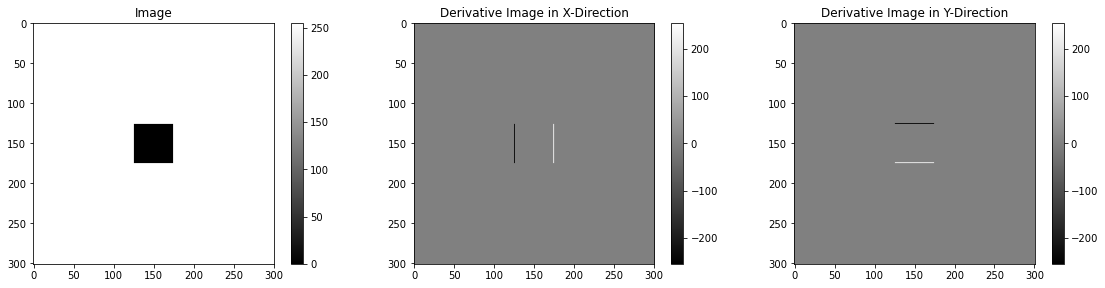

In [4]:
# Calculating gradient images along both the horizontal (dx) and vertical (dy) directions, using the input image as a reference.
dx, dy = image_grad(image)

image[y1:y2, x1:x2] = 0  # origin at the top-left corner

# Create subplots to display the original image, gradient in x, and gradient in y
plt.figure(figsize=(16, 4))

# Displaying the original Image
plt.subplot(131) # first subplot
plt.imshow(image, cmap='gray') #cmap for displaying image in gray scale
#plt.imshow: Display data as an image, i.e., on a 2D regular raster.
plt.title('Image') 
plt.colorbar()

# Displaying derivative image in x-direction
plt.subplot(132) #second subplot
plt.imshow(dx, cmap='gray')
plt.title('Derivative Image in X-Direction')
plt.colorbar()

# Displaying derivative image in y-direction
plt.subplot(133) #third subplot
plt.imshow(dy, cmap='gray')
plt.title('Derivative Image in Y-Direction')
plt.colorbar()

plt.tight_layout() #adjusting the spacing between subplots
plt.show()

*NOTE*
>> The y-axis of the result images starts from 300 because in most image processing libraries, including NumPy and Matplotlib, the origin (0,0) is typically defined in the top-left corner of the image, and the **y-axis increases as you move downward**. However, the x-axis starts from the left and increases to the right.

#### EXPLANATION OF THE PATTERN

*Derivative Image in X-direction / second subplot*
-	Represents horizontal change in intensity. 
-	When we look black line **(negative values in the gradient)** in the image we can say that image getting darker left to right suddenly. (125,125) until (125,175) which indicates pixel values decreasing. 
-	When positive values considered at (175,125) to (175,175) (White line) we can say that color is getting lighter suddenly. 

*Derivative Image in Y-direction / third subplot*
-	Represents vertical change in intensity. 
-	When we look black line in the image we can say that image getting darker and pixel values decreasing suddenly at y=125 until y=175 (as we go to bottom).
-	When positive values considered at (y=175) (White line) we can say that color is getting lighter suddenly. 



- for 2nd subplot, we move left to right and pointing out the points where change in intensity sudden. (vertical edges of square)
- for 3rd subplot, we move top to bottom and pointing out the points where change in intensity sudden. (horizontal edges of square)


**Simply:**

The second and third subplots of the gradient images reveal four lines (two black, two white) indicating sudden changes in gradient intensity. This is because the image depicts a black square on a white background. Therefore, sharp changes in the x-axis (125 to 175) and y-axis (125 to 175) coordinates are visible at the square's boundaries due to the abrupt change in color. 

In conclusion positive values in the gradient shows color is getting lighter while negative values in the gradient shows is getting darker. Large gradient values are observed as black and white pixels have large gradient.

In [5]:
# Loading the gray-scale image from disk
image = imread('gray.jpg')

# def image_grad(im):
    #it is in the [3] code (above). Tried to shorten the code and use it for all three.
    
# Computing image gradients
dx, dy = image_grad(image)


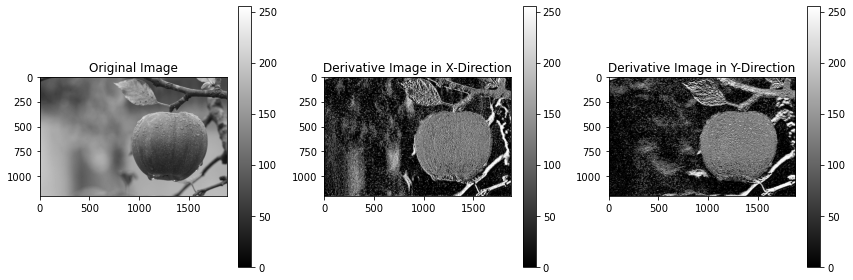

In [6]:
#note to myself: look at the first example's notes if dont understand something! as I explained detailly!!!

# Creating subplots to display the original image, gradient in x, and gradient in y
plt.figure(figsize=(12, 4))

# Original Image
plt.subplot(131) 
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.colorbar()

# Gradient in x-direction
plt.subplot(132)
plt.imshow(dx, cmap='gray')
plt.title('Derivative Image in X-Direction')
plt.colorbar()

# Gradient in y-direction
plt.subplot(133)
plt.imshow(dy, cmap='gray')
plt.title('Derivative Image in Y-Direction')
plt.colorbar()

plt.tight_layout()
plt.show()


#### EXPLANATION OF THE PATTERN 

When we compare derivative image in X-direction and Y-direction we can realize there are some differences between the patterns and colors. For example, if we examine the tree branch in two picture we can certainly see the difference as one of them show change of image intensity oriented on horizontal direction and one shows change of the image intensity in vertical direction. 

As those patterns and colors important because they help us to understand how pixel values change in my original apple image, lets compare those 2 subplots. 

Derivative image X and Y direction have different patterns even though they are based on the same image. Why? 
It shows there are changes in intensity in x or y direction that doesnt have it in other direction. Lets look (250,1000)ish coordinates in derivative image in x-direction. It has different pattern than y-direction image in same coordinates. That means there is presence of edges or transitions in image that y direction doesnt have it. Gray regions in that part shows those features are mainly oriented horizontally while different patterns in y- direction image shows those features oriented verticaly. 

Moreover, when we look at derivative image in x-direction apple itself and tree and its branches’ edges and curves are sharper which shows those have higher values concentrated in those areas. However, when we look at image in y-direction, we can see that image is more smooth, mainly focusing on the surface of the apple which means that area has more higher values. 

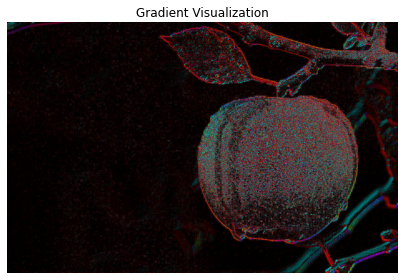

In [7]:
# Creating a function to display gradient in HSV space
def display_image_grad(imx, imy):
    # Calculating gradient magnitude
    grad_magnitude = np.sqrt(imx**2 + imy**2)
    # this gives us a measure of how quickly the image intensity is changing at a given pixel
    # gradient magnitude = rate of change in intensity 

    # Calculating gradient angle
    # this angle tells us the direction of the greatest change in image intensity at a given pixel. 
    grad_angle = np.rad2deg(np.arctan2(imy, imx)) 
    #AttributeError: module 'numpy' has no attribute 'atan2'thats why used arctan 
    #(np.rad2deg(np.atan2(...)) and np.arctan2(imy, imx) is essentially the same-interchangeble)

    # Creating HSV image 
    grad_hsv = np.zeros((imx.shape[0], imx.shape[1], 3)) #3 corresponds to the three color channels used in the HSV color space (h-s-v)
    grad_hsv[:, :, 0] = grad_angle  #Hue 
    #specifying access all rows (:) and all columns (:) of the first channel (channel 0) = [:, :, 0]
    grad_hsv[:, :, 1] = 1.0  #Saturation
    grad_hsv[:, :, 2] = grad_magnitude  #Value

    # Normalizing HSV values to the range [0, 1]
    grad_hsv /= grad_hsv.max(axis=(0, 1))
    #grad_hsv.max = calculates the maximum value across both height and width dimensions of the entire image 
    #the resulting values in grad_hsv are guaranteed to fall within the range [0, 1]

    # Converting HSV to RGB using skimage.color.hsv2rgb
    grad_rgb = hsv2rgb(grad_hsv)

    return grad_rgb


# Displaying original image and gradient visualization
plt.figure(figsize=(8, 4))

# Gradient Visualization
gradient_rgb = display_image_grad(dx, dy)
#before i created a function to display gradient in HSV space
#now:calculating the gradient visualization in HSV space and returns an RGB image in gradient_rgb
plt.imshow(gradient_rgb)
plt.title('Gradient Visualization')

# Removing x and y axis labels and ticks
plt.axis('off')

plt.tight_layout()
plt.show()
